In [6]:
import torchquantum as tq
import torchquantum.functional as tqf
from torchquantum.plugins.qiskit_plugin import tq2qiskit
import torch
import numpy as np

# Basic Usage 1

In [7]:
state = tq.QuantumState(n_wires=2)
state.h(wires=0)
state.cnot(wires=[0, 1])
tqf.h(state, wires=1)
tqf.x(state, wires=1)

print(state)
print(tq.measure(state, n_shots=1024))

QuantumState 2 wires 
 state: tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])
[OrderedDict([('00', 271), ('01', 253), ('10', 271), ('11', 229)])]


In [8]:
# state.to(torch.device('cuda'))

In [9]:
state.get_states_1d()

tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])

In [10]:
state.states

tensor([[[ 0.5000+0.j,  0.5000+0.j],
         [-0.5000+0.j,  0.5000+0.j]]])

In [11]:
print(state)

QuantumState 2 wires 
 state: tensor([[ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j,  0.5000+0.j]])


# Basic Usage 2

In [12]:
x = tq.QuantumDevice(n_wires=2)

tqf.hadamard(x, wires=0)
tqf.x(x, wires=1)
tqf.cnot(x, wires=[0, 1])

print(x)
print(tq.measure(x, n_shots=1024))

QuantumDevice 2 wires with states: tensor([[0.0000+0.j, 0.7071+0.j, 0.7071+0.j, 0.0000+0.j]])
[OrderedDict([('00', 0), ('01', 503), ('10', 521), ('11', 0)])]


In [13]:
x.states

tensor([[[0.0000+0.j, 0.7071+0.j],
         [0.7071+0.j, 0.0000+0.j]]])

# Q-Model

In [31]:
torch.Tensor([0])

tensor([0.])

In [45]:
class QModel(tq.QuantumModule):
    def __init__(self):
        super().__init__()
        self.n_wires = 2
        self.q_device = tq.QuantumDevice(n_wires=self.n_wires)
        self.rx_0 = tq.RZ(has_params=True, trainable=True)
        self.ry_0 = tq.RZ(has_params=True, init_params=3.7)
    
    def forward(self, x):
        self.rx_0(x, wires=0)
        self.ry_0(x, wires=1)
        return x

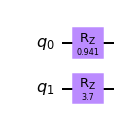

In [46]:
q_dev = tq.QuantumDevice(n_wires=2)
q_model = QModel()
circ = tq2qiskit(q_dev, q_model)
circ.draw('mpl')

In [66]:
param = torch.tensor(np.pi)
param.item()

3.1415927410125732

In [67]:
rz = tq.RZ(has_params=True, init_params=param.item())
print(type(rz))
rz.matrix

<class 'torchquantum.operators.RZ'>


tensor([[-4.3711e-08-1.j,  0.0000e+00+0.j],
        [ 0.0000e+00+0.j, -4.3711e-08+1.j]])

In [56]:
h = tq.H()
h.matrix

tensor([[ 0.7071+0.j,  0.7071+0.j],
        [ 0.7071+0.j, -0.7071+0.j]])

# QuantumState

0: QuantumState 3 wires 
 state: tensor([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

1: QuantumState 3 wires 
 state: tensor([[0.0000+0.0000j, 0.0000+0.0000j, 0.5878+0.0000j, 0.0000-0.8090j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j]])

2: QuantumState 3 wires 
 state: tensor([[0.0000+0.5237j, 0.7208+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
         0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.2668j, 0.3673+0.0000j]])



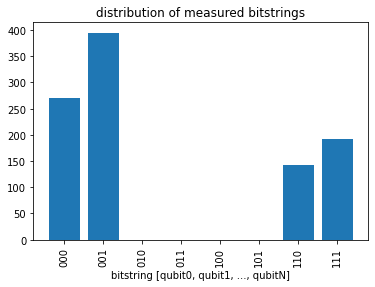

[OrderedDict([('000', 271), ('001', 395), ('010', 0), ('011', 0), ('100', 0), ('101', 0), ('110', 142), ('111', 192)])]


In [4]:
q_state = tq.QuantumState(n_wires=3)
print(f'0: {q_state}\n')
q_state.x(wires=1)
q_state.rx(wires=2, params=0.6 * np.pi)
print(f'1: {q_state}\n')
q_state.ry(wires=0, params=0.3 * np.pi)
q_state.qubitunitary(wires=1, params=[[0, 1j], [-1j, 0]])
q_state.cnot(wires=[0, 1])
print(f'2: {q_state}\n')
bitstring = tq.measure(q_state, n_shots=1000, draw_id=0)
print(bitstring)

In [88]:
state_mag = q_state.get_states_1d().abs().detach().numpy()
print(state_mag.shape)
print(state_mag, sum(state_mag))
state_prob = state_mag**2
print(state_prob, sum(state_prob))

(1, 8)
[[0.5237205  0.72083944 0.         0.         0.         0.
  0.26684892 0.36728606]] [0.5237205  0.72083944 0.         0.         0.         0.
 0.26684892 0.36728606]
[[0.27428317 0.5196095  0.         0.         0.         0.
  0.07120835 0.13489905]] [0.27428317 0.5196095  0.         0.         0.         0.
 0.07120835 0.13489905]


In [84]:
state_mag[0] / sum(state_mag), state_mag[1] / sum(state_mag), state_mag[6] / sum(state_mag), state_mag[7] / sum(state_mag)

(0.2787682538528295,
 0.3836915895626455,
 0.14203951833212639,
 0.19550063825239863)

In [86]:
state_prob[0] / sum(state_prob), state_prob[1] / sum(state_prob), state_prob[6] / sum(state_prob), state_prob[7] / sum(state_prob)

(0.2742831482208175,
 0.5196094683132756,
 0.07120834452441491,
 0.13489903894149194)

In [17]:
a = 0.2742831482208175
b = 0.5196094683132756
c = 0.07120834452441491
d = 0.13489903894149194

In [18]:
a + c - b - d

-0.3090170145095351